# **1. Binary Search**

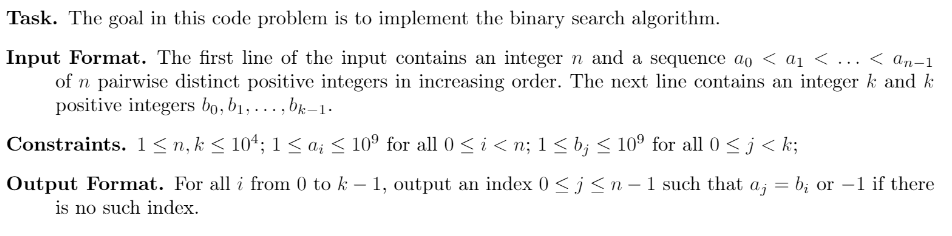

In [ ]:
def binary_search(key, query, low, high):
    if high < low:
      return -1
    mid = low + (high-low)//2
    if key == query[mid]:
      return mid
    elif key < query[mid]:
      return binary_search(key, query, low, mid-1)
    else:
      return binary_search(key, query, mid+1, high)
    return -1



n = int(input())
a = list(map(int, input().split()))
k = int(input())
b = list(map(int, input().split()))

result = []

for x in b:
  result.append(binary_search(x, a, 0, len(a)-1))

print(*result)

5
1 5 8 12 13
5
8 1 23 1 11
2 0 -1 0 -1


# **2. Binary Search with Duplicates**

In [ ]:
def binary_search(key, query, low, high):
    if high < low:
      return -1
    mid = low + (high-low)//2
    if key == query[mid]:
      if mid-1 < 0:
        return mid
      if query[mid-1] != key:
        return mid
      return binary_search(key, query, low, mid-1)
    elif key < query[mid]:
      return binary_search(key, query, low, mid-1)
    else:
      return binary_search(key, query, mid+1, high)
    return -1

n = int(input())
a = list(map(int, input().split()))
k = int(input())
b = list(map(int, input().split()))

result = []

for x in b:
  result.append(binary_search(x, a, 0, len(a)-1))

print(*result)

7
2 4 4 4 7 7 9
4
9 4 5 2
6 1 -1 0


# **3. Majority Element**

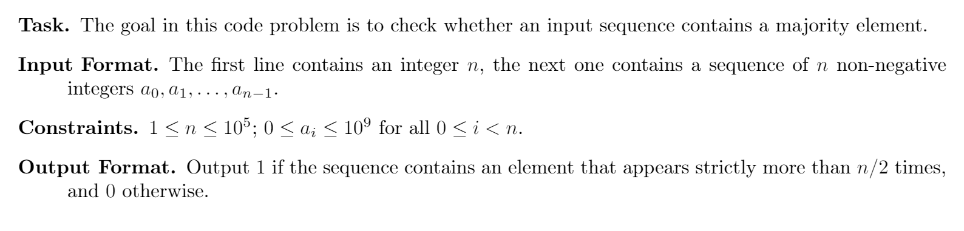

In [ ]:
# Uses python3
def get_majority_element(seq, l, r):
    if l+1==r:
        return seq[l]
    elif l+2==r:
        return seq[l]
    m = (l+r)//2
    left = get_majority_element(seq, l, m)
    right = get_majority_element(seq, m, r)

    c1, c2 = 0, 0
    for i in seq[l:r]:
        if i == left:
            c1+=1
        elif i == right:
            c2+=1
    if c1>(r-l)//2 and left != -1:
        return left
    elif c2>(r-l)//2 and right != -1:
        return right
    else: 
        return -1

n = int(input())
lst= list(map(int, input().split()))
if get_majority_element(lst, 0, n) != -1:
        print(1)
else:
        print(0)

6
2 3 9 2 2 2
1


#Improving QuickSort


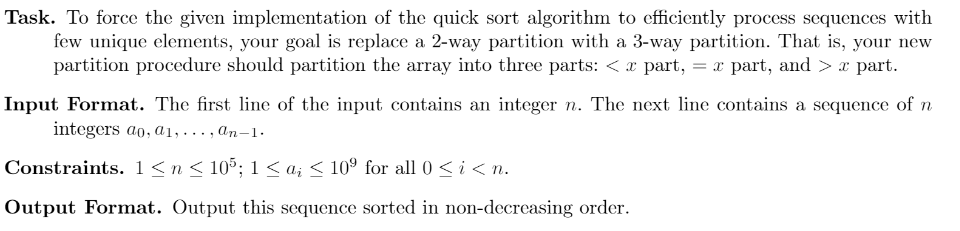

In [ ]:
def partition(arr, low, high):
    i = (low-1)         
    pivot = arr[high]    
 
    for j in range(low, high):
 
        if arr[j] <= pivot:
 
    
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)
 
# Function to do Quick sort
 
def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
        pi = partition(arr, low, high)
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
        
n = int(input())
arr = [int(i) for i in input().split()]

n = len(arr)
quickSort(arr, 0, n-1)
for i in range(n):
    print(arr[i], end=' ')

5
2 3 9 2 2
2 2 2 3 9 

#Number of Inversions

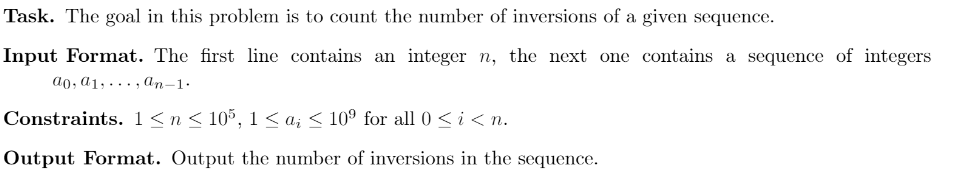

In [ ]:
def merge(left, right):
    i, j, inversion_counter = 0, 0, 0
    final = list()
    while i < len(left) and j< len(right):
        if left[i] <= right[j]:
            final.append(left[i])
            i += 1
        else:
            final.append(right[j])
            inversion_counter += len(left) - i
            j += 1

    final += left[i:]
    final += right[j:]
        
    return final, inversion_counter

def mergesort(arr):
    global tot_count
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2

    left = mergesort(arr[:mid])
    right = mergesort(arr[mid:])

    sorted_arr, temp = merge(left, right)
    tot_count += temp

    return sorted_arr

tot_count = 0
n = int(input())
seq = [int(i) for i in input().split()]
mergesort(seq)
print(tot_count)

5
2 3 9 2 9
2


#Organizing a Lottery

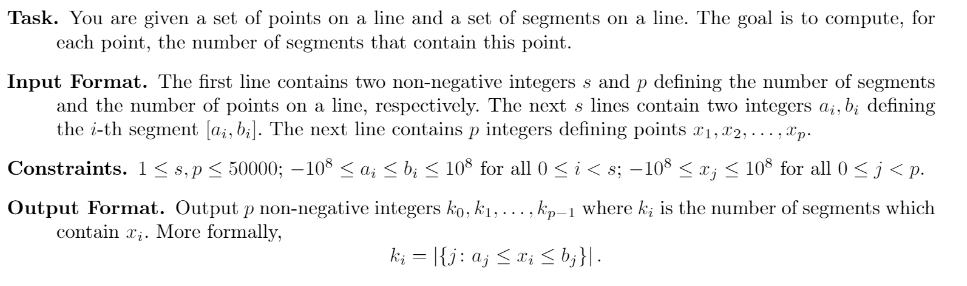

In [ ]:
import sys
from itertools import chain


def fast_count_segments(starts, ends, points):
    cnt = [0] * len(points)
    start_points = zip(starts, ['l'] * len(starts), range(len(starts)))
    end_points = zip(ends, ['r'] * len(ends), range(len(ends)))
    point_points = zip(points, ['p'] * len(points), range(len(points)))

    sort_list = chain(start_points, end_points, point_points)
    sort_list = sorted(sort_list, key=lambda a: (a[0], a[1]))
    segment = 0
    i = 0
    for num, letter, index in sort_list:
        if letter == 'l':
            segment += 1
        elif letter == 'r':
            segment -= 1
        else:
            cnt[index] = segment
            i += 1
    return cnt


def naive_count_segments(starts, ends, points):
    cnt = [0] * len(points)
    for i in range(len(points)):
        for j in range(len(starts)):
            if starts[j] <= points[i] <= ends[j]:
                cnt[i] += 1
    return cnt


if __name__ == '__main__':
    input = sys.stdin.read()
    data = list(map(int, input.split()))
    n=data[0]
    m = data[1]
    starts = data[2:2 * n + 2:2]
    ends = data[3:2 * n + 2:2]
    points = data[2 * n + 2:]
    cnt = fast_count_segments(starts, ends, points)
    for x in cnt:
        print(x, end=' ')

#Closest Points

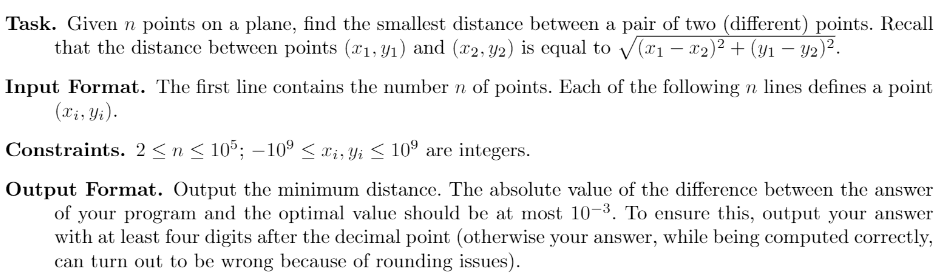

In [ ]:
import math
def dist(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def closest_split_pair(p_x, p_y, delta, best_pair):
    ln_x = len(p_x)
    mx_x = p_x[ln_x // 2][0]  

    s_y = [x for x in p_y if mx_x - delta <= x[0] <= mx_x + delta]

    best = delta  
    ln_y = len(s_y)  
    for i in range(ln_y - 1):
        for j in range(i+1, min(i + 5, ln_y)):  
            p, q = s_y[i], s_y[j]
            dst = dist(p, q)
            if dst < best:
                best_pair = p, q
                best = dst
    return best_pair[0], best_pair[1], best


def brute(ax):
    mi = dist(ax[0], ax[1])
    p1 = ax[0]
    p2 = ax[1]
    ln_ax = len(ax)
    if ln_ax == 2:
        return p1, p2, mi
    for i in range(ln_ax-1):
        for j in range(i + 1, ln_ax):
            if i != 0 and j != 1:
                d = dist(ax[i], ax[j])
                if d < mi: 
                    mi = d
                    p1, p2 = ax[i], ax[j]
    return p1, p2, mi


def closest_pair(ax, ay):
    ln_ax = len(ax)  
    if ln_ax <= 3:
        return brute(ax)  
    mid = ln_ax // 2  
    Qx = ax[:mid]  
    Rx = ax[mid:]

    midpoint = ax[mid][0]
    Qy = list()
    Ry = list()
    for x in ay:  
        if x[0] < midpoint:
           Qy.append(x)
        else:
           Ry.append(x)
    (p1, q1, mi1) = closest_pair(Qx, Qy)
    (p2, q2, mi2) = closest_pair(Rx, Ry)

    if mi1 <= mi2:
        d = mi1
        mn = (p1, q1)
    else:
        d = mi2
        mn = (p2, q2)


    (p3, q3, mi3) = closest_split_pair(ax, ay, d, mn)

    if d <= mi3:
        return mn[0], mn[1], d
    else:
        return p3, q3, mi3


def solution(a):
    ax = sorted(a, key=lambda x: x[0])  
    ay = sorted(a, key=lambda x: (x[1], x[0]))  
    p1, p2, mi = closest_pair(ax, ay)  
    return mi


# Input
points = list()
n = int(input())
for i in range(n):
    points.append([int(i) for i in input().split()])

print(solution(points))

**Captura de Pantalla Coursera**
![Semana 2 Divide and Conquer.png](https://raw.githubusercontent.com/bdleons/AlgorithmsUN2021II/main/lab14/Semana%204%20Divide%20and%20Conquer.png)

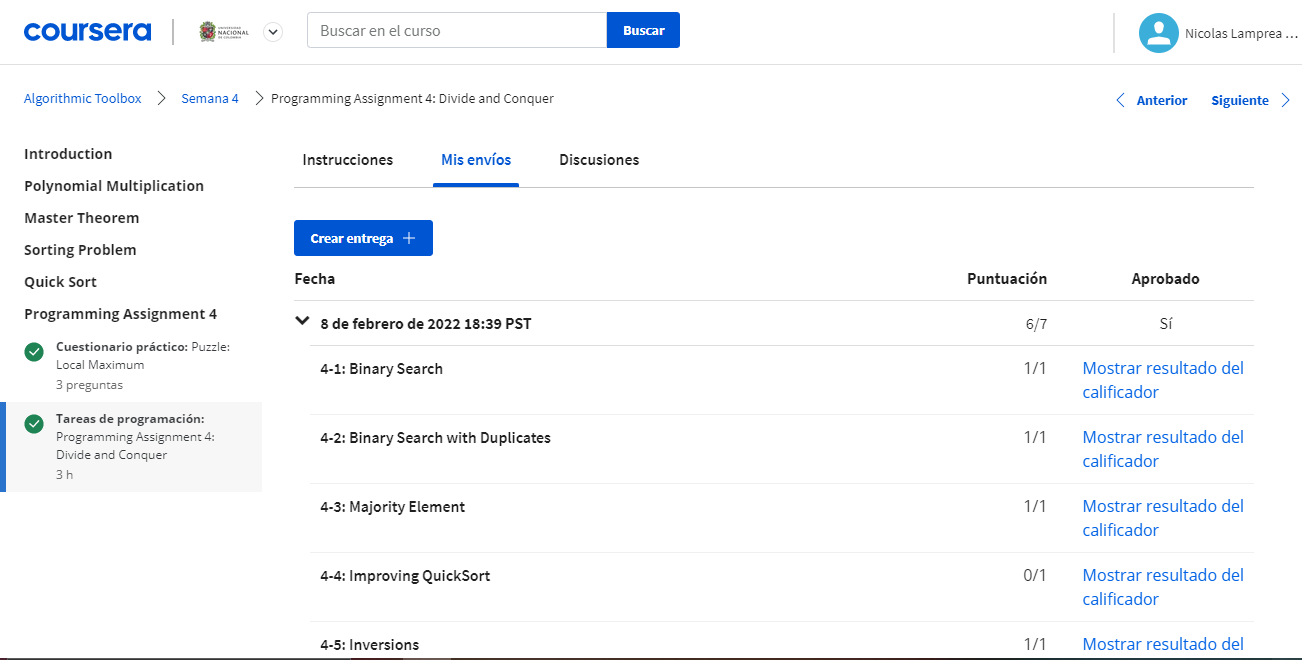

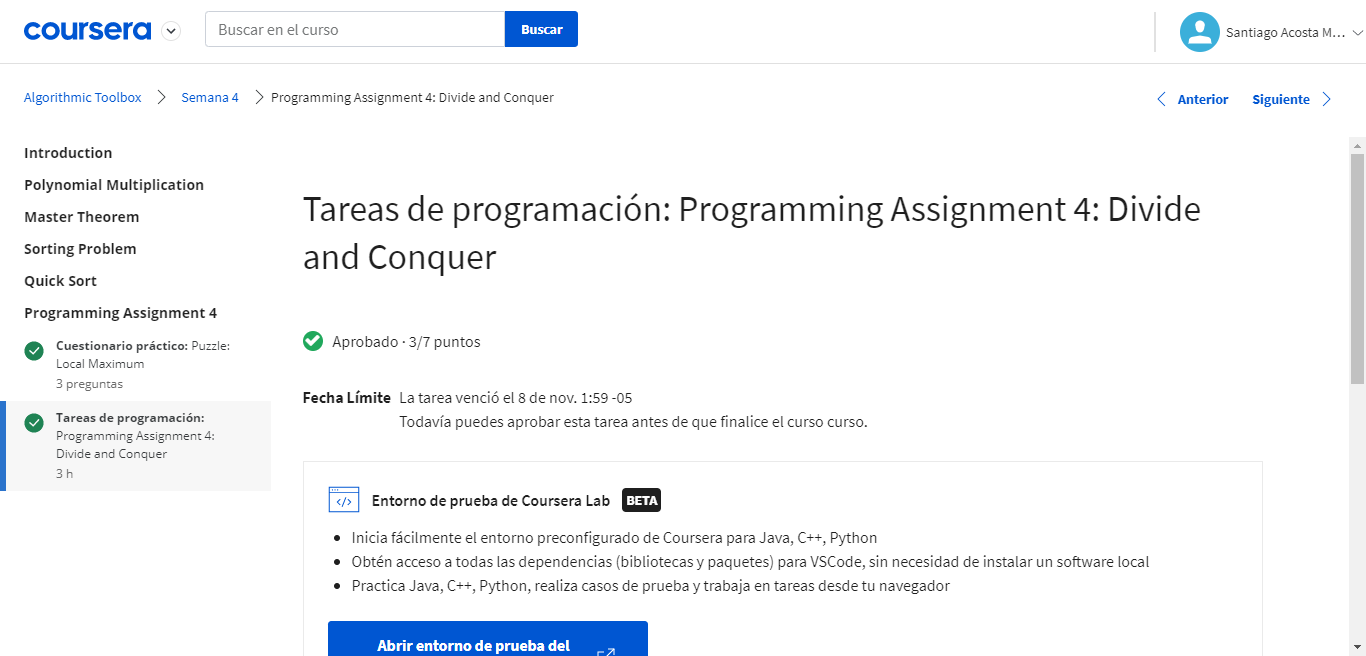